### 총 10 개 시각화

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as fm
import glob

# korean font setting
import platform
if platform.system() == 'Darwin': # macOS
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')

plt.rcParams['axes.unicode_minus'] = False

### processing.ipynb + 추가 코드... (# KAT CODE)

In [ ]:
# 푸드 데이터 로드
path_food = "./data/EC_SNS_KFOOD_ATTRACTION_DATA_*.csv"
files_food = glob.glob(path_food)
df_food = [pd.read_csv(f, encoding='utf-8') for f in files_food]
sns_kfood = pd.concat(df_food, ignore_index=True)

# 뷰티 데이터 로드
path_beauty = "./data/EC_SNS_KBEAUTY_ATTRACTION_DATA_*.csv"
files_beauty = glob.glob(path_beauty)
df_beauty = [pd.read_csv(f, encoding='utf-8') for f in files_beauty]
sns_beauty = pd.concat(df_beauty, ignore_index=True)

# 데이터 병합
full_df = pd.concat([sns_kfood, sns_beauty], ignore_index=True)


# KAT CODE
# sns 구분된 df 
sns_full_df = full_df.copy()
sns_full_df.drop(sns_full_df[sns_full_df['CHNNEL_NM'] == '채널전체'].index, inplace=True)

# 엑스/트위터 하나로 모임 (# 10. pie chart 주요 SNS 채널 인기도)
twitter_variants = ["트위터", "엑스", "엑스(구 트위터)"]
sns_full_df['CHNNEL_NM'] = sns_full_df['CHNNEL_NM'].replace(twitter_variants, "트위터/X")
print(len(sns_full_df['CHNNEL_NM'].unique()))
sns_full_df

10


,TRRSRT_NM,BASE_YM,CHNNEL_NM,BASE_YEAR_ACCMLT_FQ_CO,BASE_YM_FQ_CO,BASE_YEAR_BEFORE_MT_FQ_CO,BEFORE_MT_VERSUS_FQ_CO_IRDS_RT,AVRG_SCORE_VALUE,REVIEW_CO,PLACE_TY,...,LC_LO,ADDR,CTPRVN_NM,SIGNGU_NM,TURSM_CSTMR_CO,BEFORE_YEAR_MT_TURSM_CSTMR_CO,TURSM_CSTMR_CO_IRDS_RT,TURSM_SPND_PRICE,NATIVE_TURSM_SPND_PRICE,FRNR_TURSM_SPND_PRICE
67,거제,202412,네이버카페,3.0,NaN,NaN,NaN,4.4,8125.0,관광 명소,...,128.609125,경상남도 거제시 장평동 7-9,경상남도,거제시,1752709.0,1780002.0,-1.5,1.033871e+08,7166294.0,1225711.0
68,인천국제공항,202412,네이버카페,5.0,NaN,2.0,-1.0,4.5,31064.0,국제공항,...,126.441968,인천광역시 중구 공항로 272 인천국제공항 (ICN),인천광역시,중구,8590015.0,7898037.0,8.8,6.413506e+08,55621487.0,91662569.0
69,자갈치시장,202412,네이버카페,2.0,2.0,NaN,NaN,4.0,25397.0,수산 시장,...,129.030593,부산광역시 중구 남포동5가 105-1,부산광역시,중구,3532679.0,3696038.0,-4.4,2.025837e+08,18335155.0,7567046.0
70,청계천,202412,네이버카페,2.0,2.0,NaN,NaN,4.5,9113.0,공원,...,126.978669,서울특별시 중구 무교동 80-1,서울특별시,종로구,11797352.0,11781367.0,0.1,6.971604e+08,56458072.0,22425368.0
71,코엑스몰,202412,네이버카페,3.0,NaN,NaN,NaN,4.3,23541.0,쇼핑몰,...,127.059593,서울특별시 영동대로 513,서울특별시,강남구,18999109.0,18880221.0,0.6,1.817777e+09,163137149.0,197154442.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9675,롯데월드,202508,커뮤니티,1.0,1.0,NaN,1.0,4.3,47621.0,테마파크,...,127.098167,서울특별시 송파구 송파대로 521,서울특별시,송파구,11398247.0,76947842.0,-85.2,3.186159e+08,279178348.0,39437598.0
9676,강남,202508,커뮤니티,57.0,6.0,8.0,-0.2,4.1,598.0,관광 명소,...,127.062980,서울특별시 강남구 남부순환로 2949-2,서울특별시,강남구,19150645.0,154510026.0,-87.6,7.388118e+08,520203899.0,218607906.0
9677,인사동,202508,커뮤니티,1.0,NaN,NaN,NaN,4.3,13241.0,관광 명소,...,126.986073,서울특별시 종로구 인사동 153-10,서울특별시,종로구,11764987.0,60182490.0,-80.5,2.358357e+08,195727025.0,40108685.0
9678,조계사,202508,커뮤니티,1.0,NaN,NaN,NaN,4.5,7583.0,불교사찰,...,126.982202,서울특별시 종로구 종로1.2.3.4가동 27-7,서울특별시,종로구,11764987.0,60182490.0,-80.5,2.358357e+08,195727025.0,40108685.0


In [8]:
# 채널 이름이 체널 전체인 것들만 추출 후 0으로 초기화
full_df = full_df[full_df['CHNNEL_NM'] == '채널전체'].copy()
full_df = full_df.fillna(0)

# 사용할 컬럼 추출
use_cols = ['BASE_YM', 'CTPRVN_NM', 'SIGNGU_NM', 'TURSM_CSTMR_CO', 
            'TURSM_SPND_PRICE', 'NATIVE_TURSM_SPND_PRICE', 
            'FRNR_TURSM_SPND_PRICE', 'AVRG_SCORE_VALUE', 'REVIEW_CO', 
            'BASE_YM_FQ_CO', 'BASE_YEAR_BEFORE_MT_FQ_CO'] 
df_sub = full_df[use_cols].copy()

# 데이터 형 변환
df_sub['BASE_YM'] = pd.to_datetime(df_sub['BASE_YM'], format='%Y%m')
df_sub = df_sub.fillna(0)

# 통합 데이터 셋 (뷰티는 구별로 다른 구간도 있고 같은 구간도 있어서 평균으로 처리함)    
final_df = df_sub.groupby(['BASE_YM', 'CTPRVN_NM', 'SIGNGU_NM']).agg({
    'TURSM_SPND_PRICE': 'mean',          # 관광소비금액
    'TURSM_CSTMR_CO': 'mean',            # 관광고객수
    'NATIVE_TURSM_SPND_PRICE': 'mean',   # 내국인관광소비금액
    'FRNR_TURSM_SPND_PRICE': 'mean',     # 외국인관광소비금액 
    'AVRG_SCORE_VALUE': 'mean',          # 평점값
    'REVIEW_CO': 'mean',                 # 리뷰수
    'BASE_YM_FQ_CO': 'sum',              # 기준년월빈도수
    'BASE_YEAR_BEFORE_MT_FQ_CO' : 'sum'  # SNS기준년도이전우러빈도수
}).reset_index()

# SNS 한 달 간의 증감량
final_df['SNS_MONTHLY_DIFF'] = final_df['BASE_YM_FQ_CO'] - final_df['BASE_YEAR_BEFORE_MT_FQ_CO']

# pct_change(): 전년대비 변화량을 계산해 주는 함수 <(현재값 - 이전값) / 이전값>
# diff() : 이전값 대비 현재값의 변화량을 계산해 주는 함수 <현재값 - 이전값>
# (현재값 - 이전값) / 이전값 * 100 = 현재 성장률
final_df = final_df.sort_values(['SIGNGU_NM', 'BASE_YM'])   # pct_change()를 쓰려면 정렬이 필요
final_df = final_df.reset_index(drop=True)

# 몇몇개의 시군구명이 KR로 들어가 있는 데이터랑 '0' 들어가 있는 데이터 제거
final_df = final_df[~final_df['SIGNGU_NM'].isin(['KR', '0', 0])]
final_df = final_df.reset_index(drop=True)

# 전월 대비 소비 증감률 = (현재달 - 지난달) / 지난달 * 100
# final_df['SPND_GROWTH_RATE'] = final_df.groupby('SIGNGU_NM')['TURSM_SPND_PRICE'].pct_change() * 100
# 전월 대비 소비 증감액 = 현재달 - 지난달 (단위: 백만원)
final_df['SPND_DIFF_VALUE'] = final_df.groupby('SIGNGU_NM')['TURSM_SPND_PRICE'].diff() / 1000000

# 관광고객수 증감률 / 증감액
# final_df['CSTMR_GROWTH_RATE'] = final_df.groupby('SIGNGU_NM')['TURSM_CSTMR_CO'].pct_change() * 100
final_df['CSTMR_DIFF_VALUE'] = final_df.groupby('SIGNGU_NM')['TURSM_CSTMR_CO'].diff()

# 리뷰수 증감률 / 증감수
# final_df['REVIEW_GROWTH_RATE'] = final_df.groupby('SIGNGU_NM')['REVIEW_CO'].pct_change() * 100
final_df['REVIEW_DIFF_VALUE'] = final_df.groupby('SIGNGU_NM')['REVIEW_CO'].diff()

# 검색빈도수 증감수
final_df['SNS_DIFF_VALUE'] = final_df.groupby('SIGNGU_NM')['BASE_YEAR_BEFORE_MT_FQ_CO'].diff()   

# 결측치 및 무한대를 이전 값으로 처리 
# 변화률 위주이기 때문에 0을 넣어서 이전달과 변화가 없다 라고 평가하는게 맞다고 봄
final_df = final_df.replace([np.inf, -np.inf], np.nan)
final_df = final_df.fillna(0)

# 이상치 제거
# 중간에 보면 증감률이 8000 까지 뛸때가 있음
# 실측 오류이거나 데이터 등록에서 오류가 발생했다고 보고 마찬가지로 변화가 없다는 의미의 0으로 처리
# final_df.loc[abs(final_df['SPND_GROWTH_RATE']) > 500, ['SPND_GROWTH_RATE', 'SPND_DIFF_VAL_M']] = 0
# final_df.loc[abs(final_df['CSTMR_GROWTH_RATE']) > 500, ['CSTMR_GROWTH_RATE', 'CSTMR_DIFF_VALUE']] = 0
# final_df.loc[abs(final_df['REVIEW_GROWTH_RATE']) > 500, ['REVIEW_GROWTH_RATE', 'REVIEW_DIFF_VALUE']] = 0

# 증감률 즉 퍼센테이지는 당장에 필요 없을꺼같아서 우선 주석처리 해봤습니다.

final_df

,BASE_YM,CTPRVN_NM,SIGNGU_NM,TURSM_SPND_PRICE,TURSM_CSTMR_CO,NATIVE_TURSM_SPND_PRICE,FRNR_TURSM_SPND_PRICE,AVRG_SCORE_VALUE,REVIEW_CO,BASE_YM_FQ_CO,BASE_YEAR_BEFORE_MT_FQ_CO,SNS_MONTHLY_DIFF,SPND_DIFF_VALUE,CSTMR_DIFF_VALUE,REVIEW_DIFF_VALUE,SNS_DIFF_VALUE
0,2025-02-01,경기도,가평군,4526283.0,1330686.0,4356036.0,170247.0,4.4,36432.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
1,2025-07-01,경기도,가평군,655573.0,2688308.0,285133.0,370440.0,4.4,36800.000000,1.0,0.0,1.0,-3.870710,1357622.0,368.000000,0.0
2,2025-08-01,경기도,가평군,56729443.0,3322011.0,56258056.0,471387.0,4.4,36877.000000,1.0,1.0,0.0,56.073870,633703.0,77.000000,1.0
3,2025-09-01,경기도,가평군,39090303.0,2051913.0,38434403.0,655900.0,4.4,30306.666667,2.0,1.0,1.0,-17.639140,-1270098.0,-6570.333333,0.0
4,2025-10-01,경기도,가평군,48143693.0,2644120.0,47364911.0,778782.0,4.4,30416.666667,0.0,2.0,-2.0,9.053390,592207.0,110.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
851,2025-11-01,강원특별자치도,홍천군,33648648.0,1640793.0,33445264.0,203384.0,4.3,6697.000000,0.0,0.0,0.0,-9.659481,-606483.0,2.000000,0.0
852,2025-12-01,강원특별자치도,홍천군,36272116.0,1632712.0,34719603.0,1552513.0,4.3,6705.000000,0.0,0.0,0.0,2.623468,-8081.0,8.000000,0.0
853,2025-03-01,서울특별시,화양동,37341094.0,6797980.0,22373501.0,14967593.0,4.1,812.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
854,2025-04-01,서울특별시,화양동,33977729.0,5887682.0,21736852.0,12240877.0,4.1,817.000000,0.0,0.0,0.0,-3.363365,-910298.0,5.000000,0.0


In [9]:
# KAT CODE
# TURSM_SPND_PRICE	    Total tourism spending amount.
# TURSM_CSTMR_CO	    Number of tourism customers (visitors).
# REVIEW_CO	N           umber of SNS reviews.
# SPND_DIFF_VALUE       전월 대비 소비 증감액 = 현재달 - 지난달 (단위: 백만원) (X) SPND_GROWTH_RATE
# REVIEW_DIFF_VALUE 	리뷰수 증감수 (X) REVIEW_GROWTH_RATE


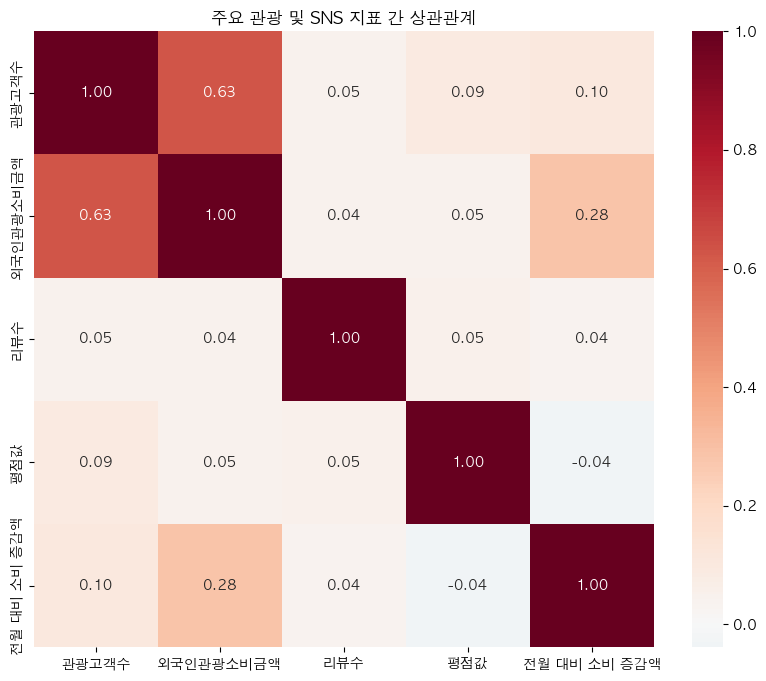

In [10]:
########## 1. Heatmap: 리뷰수 and 관광고객수 관계, impact of reviews on foreign tourism revenue
import seaborn as sns
import matplotlib.pyplot as plt

column_mapping = {
    'TURSM_CSTMR_CO': '관광고객수',
    'FRNR_TURSM_SPND_PRICE': '외국인관광소비금액',
    'REVIEW_CO': '리뷰수',
    'AVRG_SCORE_VALUE': '평점값',
    'SPND_DIFF_VALUE': '전월 대비 소비 증감액'
}
target_cols = list(column_mapping.keys())

# .rename() final_df unaffected
korean_corr_df = final_df[target_cols].rename(columns=column_mapping)
corr_matrix = korean_corr_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', center=0, fmt=".2f")

plt.title('주요 관광 및 SNS 지표 간 상관관계')
plt.show()

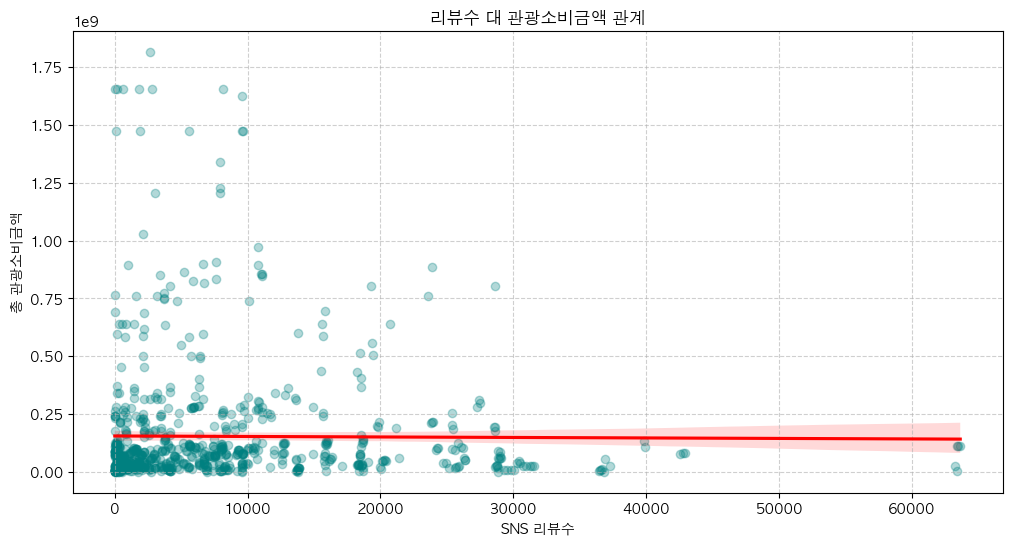

In [11]:
########## 2. scatter plot + 선형 회귀선
plt.figure(figsize=(12, 6))
# regplot to see regression line (선형 회귀선)
sns.regplot(data=final_df, x='REVIEW_CO', y='TURSM_SPND_PRICE', 
            scatter_kws={'alpha':0.3, 'color':'teal'}, line_kws={'color':'red'})

plt.title('리뷰수 대 관광소비금액 관계')
plt.xlabel('SNS 리뷰수')
plt.ylabel('총 관광소비금액')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

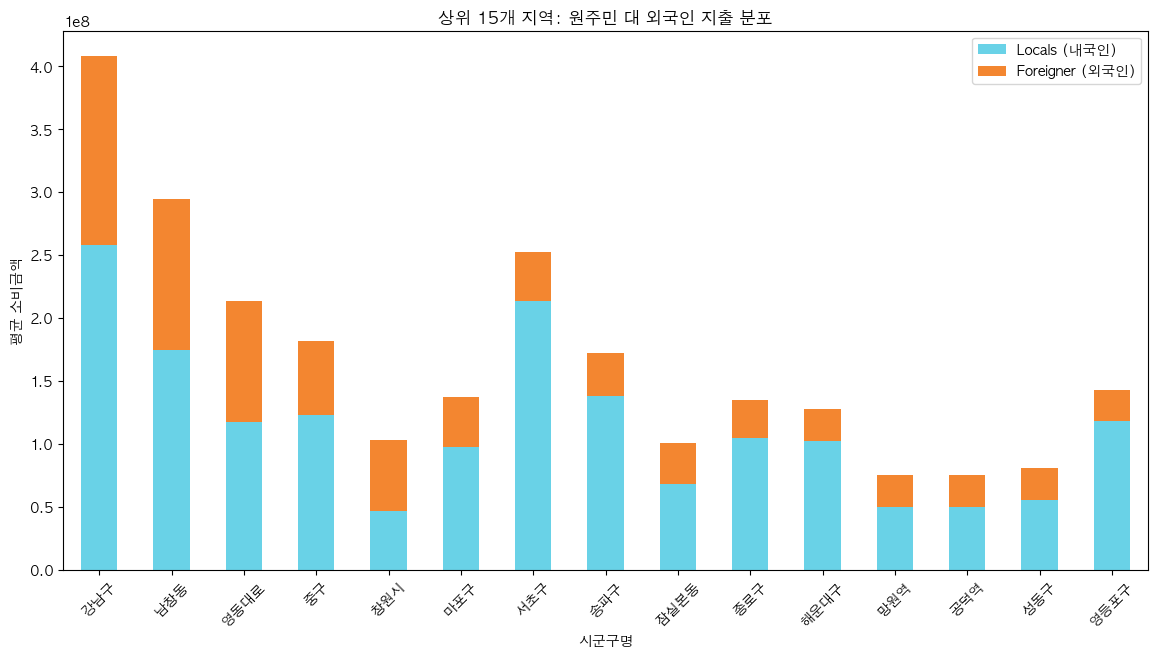

In [12]:
########## 3. bar chart (내국인 vs 외국인 소비)
# 상위 15개 지역 (top 15 districts)
top_districts = final_df.groupby('SIGNGU_NM')[['NATIVE_TURSM_SPND_PRICE', 'FRNR_TURSM_SPND_PRICE']].mean().sort_values('FRNR_TURSM_SPND_PRICE', ascending=False).head(15)

top_districts.plot(kind='bar', stacked=True, figsize=(14, 7), color=['#69d2e7', '#f38630'])

plt.title('상위 15개 지역: 원주민 대 외국인 지출 분포')
plt.xlabel('시군구명') #SIGNGU_NM
plt.ylabel('평균 소비금액')
plt.legend(['Locals (내국인)', 'Foreigner (외국인)'])
plt.xticks(rotation=45)
plt.show()


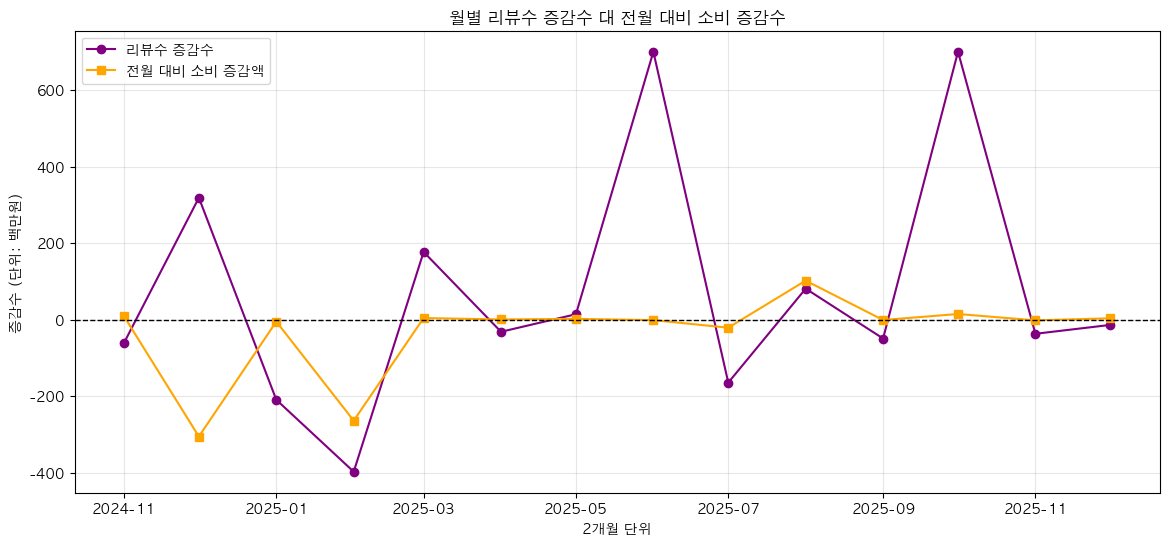

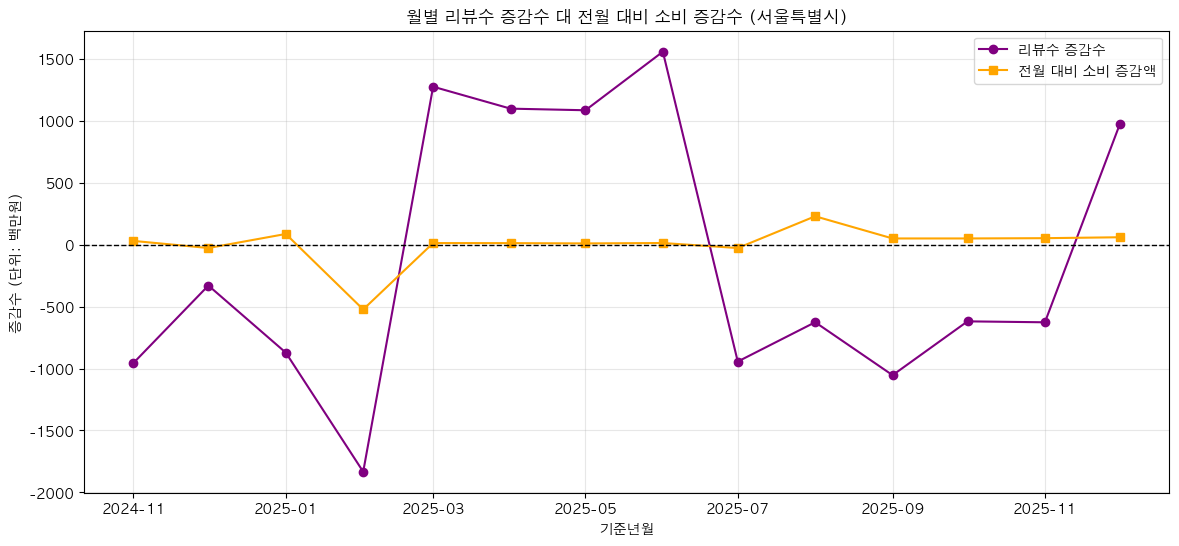

In [13]:
########## 4. 증감수 Dual Line Chart 리뷰수 증감수 vs. 전월 대비 소비 증감액
# use the mean of all (지역 전체 REVIEW_DIFF_VALUE(리뷰수 증감수), SPND_DIFF_VALUE(전월 대비 소비 증감액) 평균 )
monthly_growth = final_df.groupby('BASE_YM')[['REVIEW_DIFF_VALUE', 'SPND_DIFF_VALUE']].mean().reset_index()

plt.figure(figsize=(14, 6))
plt.plot(monthly_growth['BASE_YM'], monthly_growth['REVIEW_DIFF_VALUE'], marker='o', label='리뷰수 증감수', color='purple')
plt.plot(monthly_growth['BASE_YM'], monthly_growth['SPND_DIFF_VALUE'], marker='s', label='전월 대비 소비 증감액', color='orange')

plt.axhline(0, color='black', linewidth=1, linestyle='--') # Baseline
plt.title('월별 리뷰수 증감수 대 전월 대비 소비 증감수')
plt.xlabel('2개월 단위')
plt.ylabel('증감수 (단위: 백만원)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### for Seoul  증감수 Dual Line Chart (서울특별시 전용)
seoul_df = final_df[final_df['CTPRVN_NM'] == '서울특별시']

monthly_growth = seoul_df.groupby('BASE_YM')[['REVIEW_DIFF_VALUE', 'SPND_DIFF_VALUE']].mean().reset_index()

plt.figure(figsize=(14, 6))
plt.plot(monthly_growth['BASE_YM'], monthly_growth['REVIEW_DIFF_VALUE'], marker='o', label='리뷰수 증감수', color='purple')
plt.plot(monthly_growth['BASE_YM'], monthly_growth['SPND_DIFF_VALUE'], marker='s', label='전월 대비 소비 증감액', color='orange')

plt.axhline(0, color='black', linewidth=1, linestyle='--') 
plt.title('월별 리뷰수 증감수 대 전월 대비 소비 증감수 (서울특별시)')
plt.xlabel('기준년월')
plt.ylabel('증감수 (단위: 백만원)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

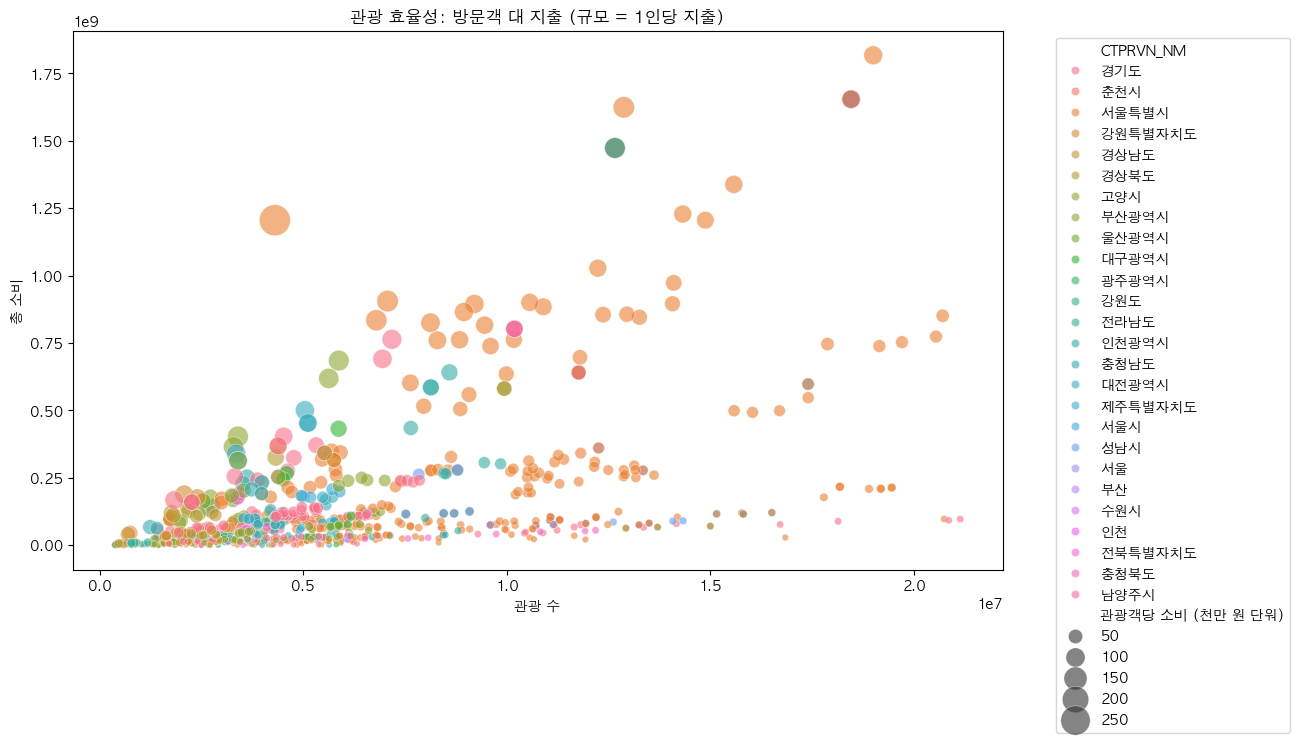

In [14]:
########## 5. scatterplot 어느 지역에서 관광객의 소비가 제일 많은가
# Calculate Spending per Customer for visualization
final_df['관광객당 소비 (천만 원 단워)'] = final_df['TURSM_SPND_PRICE'] / (final_df['TURSM_CSTMR_CO'] + 1)

plt.figure(figsize=(12, 7))
sns.scatterplot(data=final_df, x='TURSM_CSTMR_CO', y='TURSM_SPND_PRICE', 
                size='관광객당 소비 (천만 원 단워)', hue='CTPRVN_NM', sizes=(20, 500), alpha=0.6) #SPND_PER_CSTMR (old name)

plt.title('관광 효율성: 방문객 대 지출 (규모 = 1인당 지출)') #Tourism Efficiency
plt.xlabel('관광 수')
plt.ylabel('총 소비')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

/var/folders/wb/bbyhbcc95_l7p6410jysv6tm0000gn/T/ipykernel_49704/1362320988.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




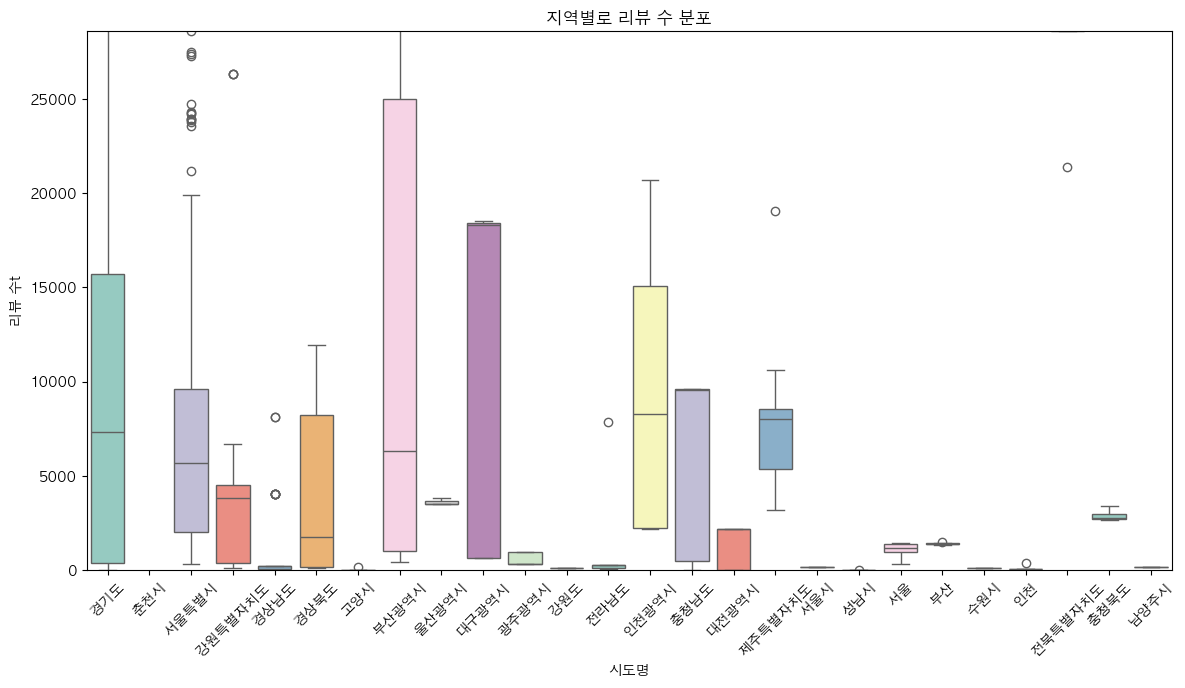

In [15]:
########## 6. boxplot 리뷰 많은 지역 (어느 지역이 원래 리뷰가 많고 어느 지역은 viral한 리뷰있냐)
plt.figure(figsize=(14, 7))
sns.boxplot(data=final_df, x='CTPRVN_NM', y='REVIEW_CO', palette='Set3')

plt.title('지역별로 리뷰 수 분포') #distibution of review counts by province / district
plt.xlabel('시도명')
plt.ylabel('리뷰 수t')
plt.xticks(rotation=45)
# Limiting y-axis if outliers make the box too small to see
plt.ylim(0, final_df['REVIEW_CO'].quantile(0.95)) 
plt.show() # 박스가 클수록 일관되게 인기많음 (bigger the box, more popular consistently)



<Figure size 1000x1000 with 0 Axes>

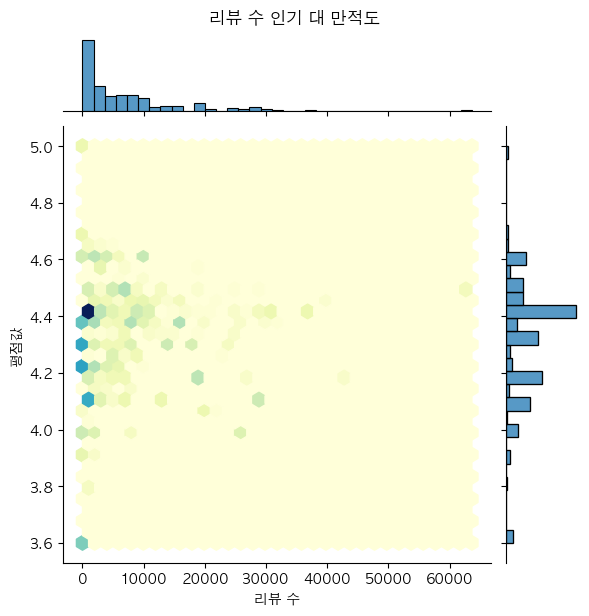

In [16]:
########## 7. joint plot (리뷰 많은 곳 들이 실제로 high score 있는지)
# top right=인기 많고 좋은 점수 (reviews) | bottom right=인기 많지만 점수 안좋음 (reviews)
plt.figure(figsize=(10, 10))
joint = sns.jointplot(data=final_df, x='REVIEW_CO', y='AVRG_SCORE_VALUE', 
                      kind='hex', cmap='YlGnBu')

joint.figure.suptitle('리뷰 수 인기 대 만적도', y=1.02)
joint.set_axis_labels('리뷰 수', '평점값')
plt.show()


In [17]:
########## 8.which sns is most popular by location
df_sub_sns = sns_full_df.copy()

sns_popularity_df = df_sub_sns.groupby(['CTPRVN_NM', 'CHNNEL_NM']).agg({
    'REVIEW_CO': 'sum',
    'TURSM_SPND_PRICE': 'sum'
}).reset_index()

import plotly.express as px
fig = px.treemap(sns_popularity_df, 
                 path=['CTPRVN_NM', 'CHNNEL_NM'], 
                 values='REVIEW_CO',
                 title='지역별 SNS 인기도 계층적 관점')
fig.show()

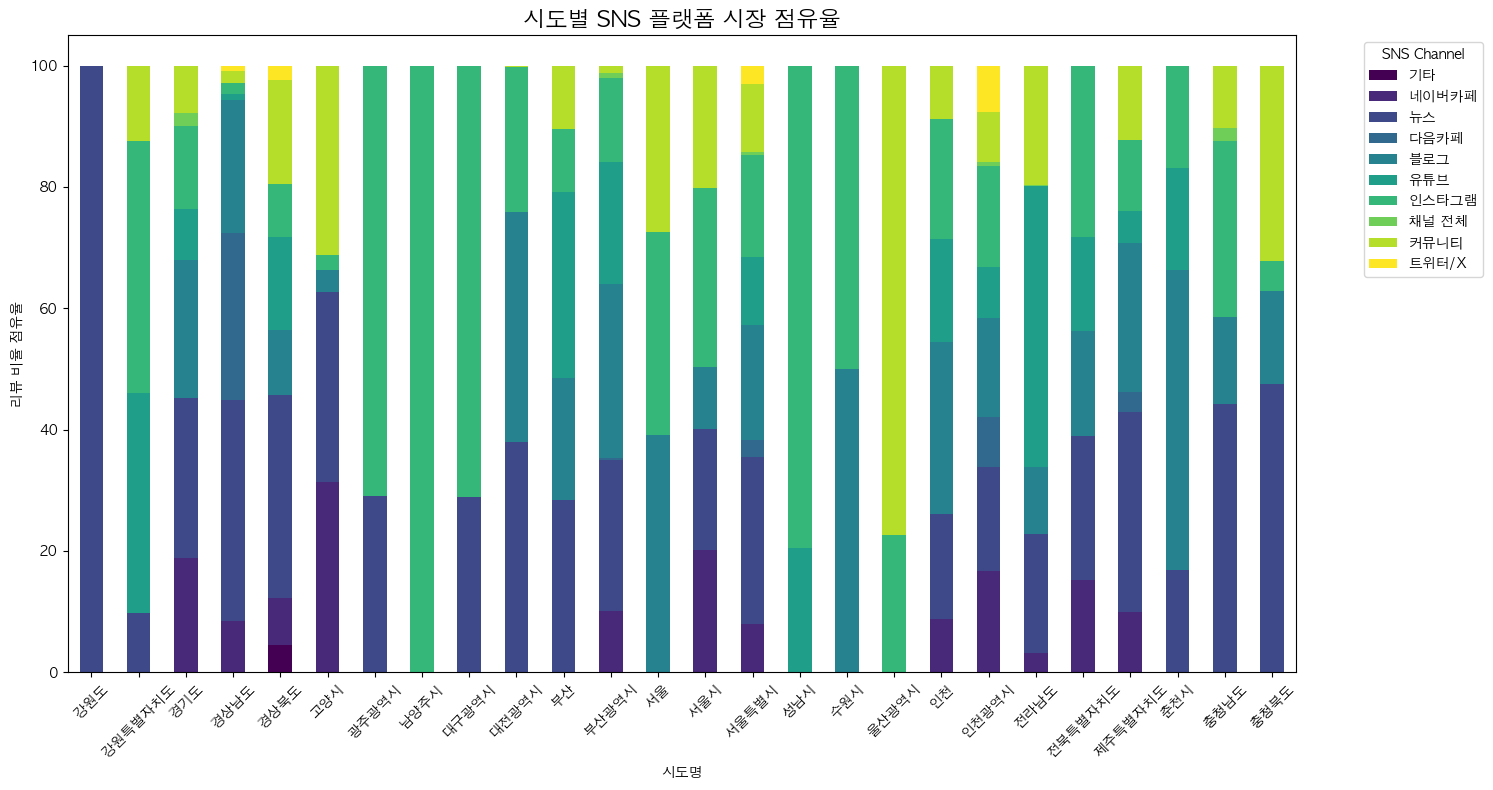

In [18]:
########## 9. pie chart 주요 SNS 채널 인기도
sns_market_share = sns_full_df.groupby(['CTPRVN_NM', 'CHNNEL_NM'])['REVIEW_CO'].sum().unstack().fillna(0)
sns_market_share_pct = sns_market_share.div(sns_market_share.sum(axis=1), axis=0) * 100

sns_market_share_pct.plot(kind='bar', stacked=True, figsize=(15, 8), colormap='viridis')

plt.title('시도별 SNS 플랫폼 시장 점유율', fontsize=16)
plt.ylabel('리뷰 비율 점유율')
plt.xlabel('시도명')
plt.legend(title='SNS Channel', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

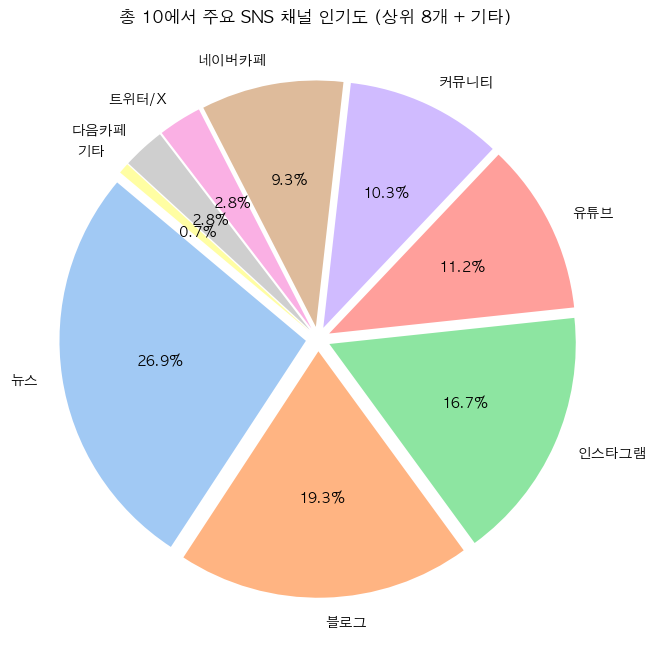

In [19]:
########## 10. pie chart 주요 SNS 채널 인기도
sns_popularity = sns_full_df.groupby('CHNNEL_NM')['REVIEW_CO'].sum().sort_values(ascending=False)

top_n = 8
top_channels = sns_popularity.iloc[:top_n]
others_sum = sns_popularity.iloc[top_n:].sum()
others = pd.Series([others_sum], index=['기타'])

final_pie_data = pd.concat([top_channels, others])

plt.figure(figsize=(10, 8))
plt.pie(final_pie_data, labels=final_pie_data.index, autopct='%1.1f%%', 
        startangle=140, colors=sns.color_palette('pastel'),
        explode=[0.05] * len(final_pie_data))

plt.title('총 10에서 주요 SNS 채널 인기도 (상위 8개 + 기타) ')
plt.show()
